# Исследование влияния батча на целевую функцию классификатора

Сгенерируем некоторый набор данных с двумя классами. Для него сформируем простой линейный классификатор, веса которого сможем легко изменять посмторим как функция кросс энтропии будет себя вести. 

In [41]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

import plotly.graph_objects as go

# Подготовка метода для формирования данных

Будет две двумерные-нормальные случайные величины. С настройками близости и дисперсии.

In [3]:
def create_exmaple_data(
    distance, sigma, 
    class0_count = 200, 
    class1_count = 200
):
    pos = distance/(2*sqrt(distance))
    data =\
    np.concatenate([
        np.concatenate([
            np.random.normal(pos, sigma, [class0_count, 2]),
            np.zeros([class0_count,1])
        ], axis = 1),
        np.concatenate([
            np.random.normal(-pos, sigma, [class1_count, 2]),
            np.ones([class1_count,1])
        ],axis = 1)
    ])
    
    return data

Нанести диаграмму рассеяния

In [4]:
def plot_scatter(data):
    for level in np.unique(data[:, 2]):
        cond = (data[:,2] == level)
        plt.scatter(data[cond,0], data[cond,1])
    
    plt.xlabel('$x_1$', loc = 'right', fontsize = 13)
    plt.ylabel('$x_2$', loc = 'top', fontsize = 13)
    plt.legend(np.unique(data[:,2].astype('int')))

Примерить линейный классификатор с преданными весами - идентификационная форма логистическая регрессия.

In [179]:
def linear_classy_pred(w1, w2, data):
    # output - np.array - вектор предсказаний модели
    return 1/(1+np.exp(-w1*data[:,0] - data[:,1]))

Вычисление функци кросс-энропии

In [180]:
def cross_entropy_fun(y,p):
    return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))

Для указанный множеств весов подготовить сетку и значения ошибки

In [181]:
def get_losses(w1, w2, data):

    ww1, ww2 = np.meshgrid(w1, w2)
    losses = np.array([])

    for i in range(ww1.shape[0]):
        for j in range( ww1.shape[1]):
            preds = linear_classy_pred(ww1[i,j], ww2[i,j], data)
            losses = np.append(
                losses,
                cross_entropy_fun(data[:, 2], preds)
            )
            
    return ww1.ravel(), ww2.ravel(), losses

# Наконец проведем вычисления

TypeError: Input z must be 2D, not 1D

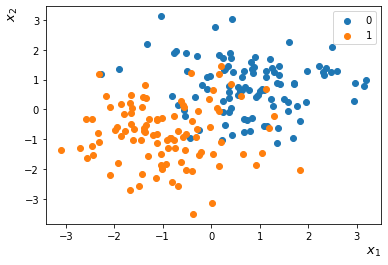

In [190]:
data = create_exmaple_data(3,1, 100, 100)
import matplotlib.pyplot as plt

w1 = np.linspace(-5, 1, 50)
w2 = np.linspace(-5, 1, 50)

ww1, ww2, losses = get_losses(w1, w2, data)

plot_scatter(data)
plt.contour(ww1.res, ww1, losses)
# test_preds = linear_classy_pred(-0.5,-0.5,data)

# print('предсказываемые вероятностия для 0')
# print(np.mean(test_preds[0:200]))
# print('предсказыаемые вероятности для 1')
# print(np.mean(test_preds[200:]))
# print('среднаяя ошибка')
# w1 = np.linspace(-1, 1, 50)*20
# w2 = np.linspace(-1, 1, 50)*20
# print(np.mean(get_losses(-0.5, -0.5, data)))

In [188]:




# traces = []

# traces.append(
#     go.Mesh3d(
#         x = ww1,
#         y = ww2,
#         z = losses
#     )
# )

# fig = go.Figure(traces)
# fig.show()

In [178]:
my_min = np.argmin(losses)
print("Оптимум по первому весу " + str(ww1[my_min]))
print("Оптимум по второму весу " + str(ww2[my_min]))

Оптимум по первому весу -0.9591836734693882
Оптимум по второму весу -1.0816326530612246
